In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

In [3]:
##loading processed dataset
X_train = pd.read_csv("../../../data/processed/X_train.csv")
X_test  = pd.read_csv("../../../data/processed/X_test.csv")

y_train = pd.read_csv("../../../data/processed/y_train.csv").squeeze()
y_test  = pd.read_csv("../../../data/processed/y_test.csv").squeeze()


In [4]:
##testing
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Train churn rate:", y_train.mean())
print("Test churn rate:", y_test.mean())

Train shape: (8101, 38)
Test shape: (2026, 38)
Train churn rate: 0.1607208986544871
Test churn rate: 0.16041461006910168


## training logistic regression

In [5]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000, random_state=42)

log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [6]:
##predictions

y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:,1]

In [7]:
def evaluate_model(y_test, y_pred, y_prob):
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("ROC AUC  :", roc_auc_score(y_test, y_prob))

In [8]:
print("Logistic Regression Results\n")
evaluate_model(y_test, y_pred_log, y_prob_log)

Logistic Regression Results

Accuracy : 0.9160908193484699
Precision: 0.8215767634854771
Recall   : 0.6092307692307692
F1 Score : 0.6996466431095406
ROC AUC  : 0.9303595170261837


## training Random forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=300, n_jobs=-1, random_state=42)

In [10]:
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

In [11]:
print("Random Forest Results\n")
evaluate_model(y_test, y_pred_rf, y_prob_rf)

Random Forest Results

Accuracy : 0.9570582428430404
Precision: 0.9280575539568345
Recall   : 0.7938461538461539
F1 Score : 0.8557213930348259
ROC AUC  : 0.9863320218875774


In [12]:
thresholds = np.arange(0.1, 0.9, 0.05)

for t in thresholds:
    preds = (y_prob_rf >= t).astype(int)
    rec = recall_score(y_test, preds)
    prec = precision_score(y_test, preds)
    print(f"Threshold {t:.2f} → Recall {rec:.3f} | Precision {prec:.3f}")

Threshold 0.10 → Recall 0.982 | Precision 0.546
Threshold 0.15 → Recall 0.969 | Precision 0.633
Threshold 0.20 → Recall 0.954 | Precision 0.698
Threshold 0.25 → Recall 0.945 | Precision 0.762
Threshold 0.30 → Recall 0.932 | Precision 0.815
Threshold 0.35 → Recall 0.898 | Precision 0.844
Threshold 0.40 → Recall 0.868 | Precision 0.876
Threshold 0.45 → Recall 0.843 | Precision 0.919
Threshold 0.50 → Recall 0.794 | Precision 0.928
Threshold 0.55 → Recall 0.735 | Precision 0.956
Threshold 0.60 → Recall 0.698 | Precision 0.974
Threshold 0.65 → Recall 0.625 | Precision 0.981
Threshold 0.70 → Recall 0.557 | Precision 0.995
Threshold 0.75 → Recall 0.477 | Precision 0.994
Threshold 0.80 → Recall 0.375 | Precision 1.000
Threshold 0.85 → Recall 0.265 | Precision 1.000


In [13]:
"""
Threshold tuning was performed to optimize recall.

Default threshold (0.50):
Recall = 79%

Business threshold (0.30):
Recall = 93%
Precision = 81%

This threshold is chosen because missing a churner is more
costly than contacting a non-churner in retention campaigns.
"""

'\nThreshold tuning was performed to optimize recall.\n\nDefault threshold (0.50):\nRecall = 79%\n\nBusiness threshold (0.30):\nRecall = 93%\nPrecision = 81%\n\nThis threshold is chosen because missing a churner is more\ncostly than contacting a non-churner in retention campaigns.\n'

In [14]:
 !pip install xgboost


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
    --------------------------------------- 1.6/101.7 MB 8.4 MB/s eta 0:00:12
   - -------------------------------------- 3.4/101.7 MB 8.6 MB/s eta 0:00:12
   -- ------------------------------------- 5.5/101.7 MB 9.4 MB/s eta 0:00:11
   --- ------------------------------------ 7.9/101.7 MB 9.9 MB/s eta 0:00:10
   ---- ----------------------------------- 10.5/101.7 MB 10.4 MB/s eta 0:00:09
   ----- ---------------------------------- 13.1/101.7 MB 10.7 MB/s eta 0:00:09
   ----- ---------------------------------- 15.2/101.7 MB 10.8 MB/s eta 0:00:09
   ------- -------------------------------- 17.8/101.7 MB 10.9 MB/s eta 0:00:08
   ------- -------------------------------- 20.2/101.7 MB 10.9 MB/s eta 0:00:08
   -------- ------------------------------- 22.8/101.7 MB 11.1 MB/s eta 0:00:08
   --------- ------------------------------ 25.2/101.7 MB 11.1 MB/s eta 0:00:07
   ----------- ---------------------------- 28.0/101.7 M

## Training Boosting model

In [15]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=400,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, ...)

In [16]:
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:,1]

In [17]:
print("XGBoost Results\n")
evaluate_model(y_test, y_pred_xgb, y_prob_xgb)

XGBoost Results

Accuracy : 0.9718657453109576
Precision: 0.958904109589041
Recall   : 0.8615384615384616
F1 Score : 0.9076175040518638
ROC AUC  : 0.9932908244019355


In [18]:
import numpy as np

thresholds = np.arange(0.1, 0.9, 0.05)

for t in thresholds:
    preds = (y_prob_xgb >= t).astype(int)
    rec = recall_score(y_test, preds)
    prec = precision_score(y_test, preds)
    print(f"Threshold {t:.2f} → Recall {rec:.3f} | Precision {prec:.3f}")

Threshold 0.10 → Recall 0.951 | Precision 0.776
Threshold 0.15 → Recall 0.938 | Precision 0.824
Threshold 0.20 → Recall 0.923 | Precision 0.860
Threshold 0.25 → Recall 0.920 | Precision 0.909
Threshold 0.30 → Recall 0.905 | Precision 0.922
Threshold 0.35 → Recall 0.898 | Precision 0.933
Threshold 0.40 → Recall 0.889 | Precision 0.951
Threshold 0.45 → Recall 0.880 | Precision 0.953
Threshold 0.50 → Recall 0.862 | Precision 0.959
Threshold 0.55 → Recall 0.849 | Precision 0.962
Threshold 0.60 → Recall 0.837 | Precision 0.968
Threshold 0.65 → Recall 0.818 | Precision 0.971
Threshold 0.70 → Recall 0.797 | Precision 0.977
Threshold 0.75 → Recall 0.782 | Precision 0.981
Threshold 0.80 → Recall 0.757 | Precision 0.984
Threshold 0.85 → Recall 0.711 | Precision 0.987


cross validating

In [20]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    
    "Random Forest": RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    ),
    
    "XGBoost": XGBClassifier(
        n_estimators=400,
        max_depth=4,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric='logloss'
    )
}



In [21]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []

for name, model in models.items():
    roc_scores = cross_val_score(
        model, X_train, y_train,
        scoring='roc_auc',
        cv=cv, n_jobs=-1
    )
    
    recall_scores = cross_val_score(
        model, X_train, y_train,
        scoring='recall',
        cv=cv, n_jobs=-1
    )
    
    results.append({
        "Model": name,
        "ROC-AUC Mean": roc_scores.mean(),
        "ROC-AUC Std": roc_scores.std(),
        "Recall Mean": recall_scores.mean(),
        "Recall Std": recall_scores.std()
    })

cv_results = pd.DataFrame(results)
cv_results

,Model,ROC-AUC Mean,ROC-AUC Std,Recall Mean,Recall Std
0,Logistic Regression,0.933102,0.005591,0.629083,0.033925
1,Random Forest,0.988192,0.002497,0.806490,0.035122
2,XGBoost,0.993374,0.001567,0.887126,0.020532


In [22]:
"""
Final Model Selection

We compared Logistic Regression, Random Forest and XGBoost
using 5-fold Stratified Cross-Validation.

Results:
• XGBoost achieved the highest ROC-AUC and Recall.
• Low standard deviation across folds indicates stable performance.
• Test performance closely matches CV performance → no overfitting.

Final production model:
XGBoost with probability threshold = 0.30
to maximize recall for retention campaigns.
"""

'\nFinal Model Selection\n\nWe compared Logistic Regression, Random Forest and XGBoost\nusing 5-fold Stratified Cross-Validation.\n\nResults:\n• XGBoost achieved the highest ROC-AUC and Recall.\n• Low standard deviation across folds indicates stable performance.\n• Test performance closely matches CV performance → no overfitting.\n\nFinal production model:\nXGBoost with probability threshold = 0.30\nto maximize recall for retention campaigns.\n'

In [23]:
!pip install shap

   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   ---------------------------------------- 549.1/549.1 kB 6.8 MB/s  0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------------------------------ --------- 2.1/2.8 MB 10.9 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 10.2 MB/s  0:00:00
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   - -------------------------------------- 1.8/38.1 MB 9.4 MB/s eta 0:00:04
   --- ------------------------------------ 3.1/38.1 MB 7.8 MB/s eta 0:00:05
   ------ --------------------------------- 5.8/38.1 MB 9.3 MB/s eta 0:00:04
   -------- ------------------------------- 8.4/38.1 MB 10.2 MB/s eta 0:00:03
   ----------- ---------------------------- 11.3/38.1 MB 11.0 MB/s eta 0:00:03
   --------------- ------------------------ 14.7/38.1 MB 11.9 MB/s eta 0:00:02
   ------------------ --------------------- 17.6/38.1 MB 12.2 MB/s eta 0:00:02
   -------------


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
## fitting final XGBoost data on the entire training model

In [25]:
# combine train + test
X_full = pd.concat([X_train, X_test], axis=0)
y_full = pd.concat([y_train, y_test], axis=0)

final_model = XGBClassifier(
    n_estimators=400,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

final_model.fit(X_full, y_full)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, ...)

In [37]:
!pip install shap

In [34]:
# combine train + test
X_full = pd.concat([X_train, X_test], axis=0)
y_full = pd.concat([y_train, y_test], axis=0)

final_model = XGBClassifier(
    n_estimators=400,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

final_model.fit(X_full, y_full)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, ...)

In [40]:
import sys
!{sys.executable} -m pip install shap

  Using cached shap-0.50.0-cp313-cp313-win_amd64.whl.metadata (25 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
Using cached shap-0.50.0-cp313-cp313-win_amd64.whl (549 kB)
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)

   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   ---------------------------------------- 2/2 [shap]



In [41]:
import shap

explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_full)

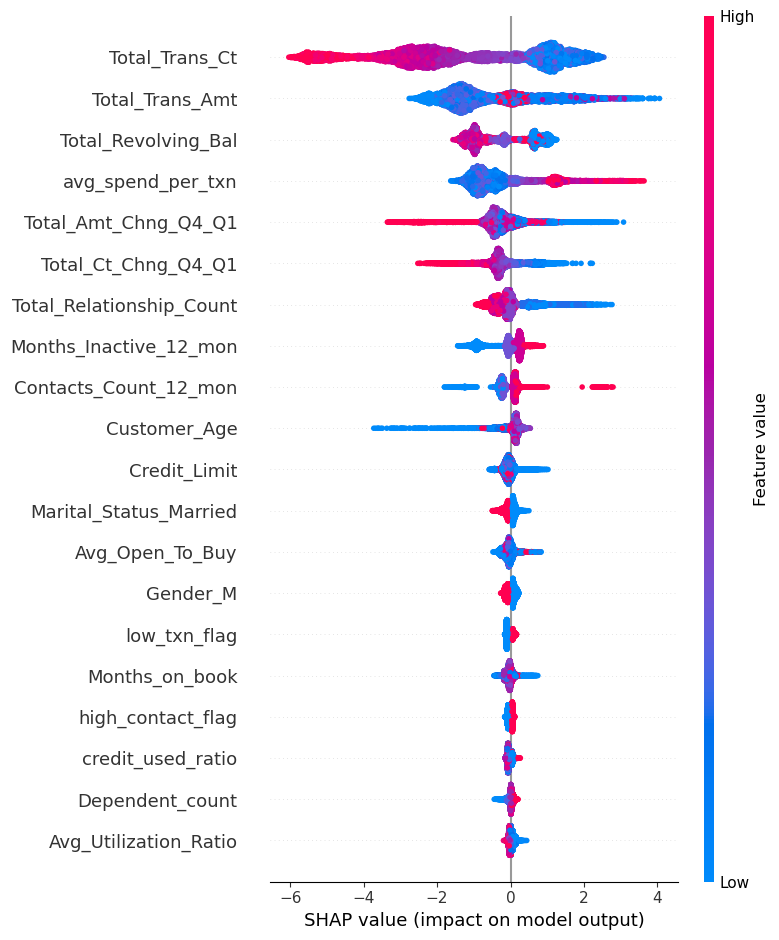

In [42]:
shap.summary_plot(shap_values, X_full)

In [43]:
"""
SHAP explainability reveals that churn is primarily driven by
behavioural disengagement rather than demographics.

Top churn drivers:
• Low transaction count
• Low transaction amount
• Low credit usage
• Decline in activity over time
• Higher inactivity months
• More customer service contacts
• Fewer banking relationships

These insights align strongly with EDA findings and validate
the model’s behaviour.
"""


'\nSHAP explainability reveals that churn is primarily driven by\nbehavioural disengagement rather than demographics.\n\nTop churn drivers:\n• Low transaction count\n• Low transaction amount\n• Low credit usage\n• Decline in activity over time\n• Higher inactivity months\n• More customer service contacts\n• Fewer banking relationships\n\nThese insights align strongly with EDA findings and validate\nthe model’s behaviour.\n'

In [44]:
import joblib

joblib.dump(final_model, "../../../data/processed/churn_model.pkl")

['../../../data/processed/churn_model.pkl']